In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SolverAlgorithms import solveArchLength_copy
from TwoDofSlantedTruss import SlantedTrussStructure, SlantedTrussStructure_original
from BeamModels import SimplySupportedBeamModel_new, CantileverWithEndMoment

In [2]:
Ks = 10.0 # Stiffness of slanted element
Kv = 10.0 # Stiffness of vertical element
#Kv = 0.10
Kv =  0.10
LH  = 1.0 # Horizontal length of slanted truss
LV  = -0.2 # Vertical length of slanted truss
F0 = 0.1

#model = SlantedTrussStructure(LH, LV, Ks, Kv, F0)

In [3]:
#solveArchLength_copy(model, arcLength=0.02, max_steps=50)

Deformert elementvektor [-0.  0.  0.  0.  0.  0.]
Deformert elementvektor [-0.  0.  0.  0.  0.  0.]
Total displacements: 
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.06858347e-05 3.14159265e-05 0.00000000e+00 2.82743339e-04
 6.28318531e-05]
------------------------------------------------------------------------------------
x displacements [0.0, 0.0, 0.0]
y displacements [0.0, 0.0, 0.0]
------------------------------------------------------------------------------------
Deformert elementvektor [-2.77582402e-10  0.00000000e+00 -1.57079633e-05  2.77582402e-10
  0.00000000e+00  1.57079633e-05]
Deformert elementvektor [-2.49824339e-09  0.00000000e+00 -1.57079632e-05  2.49824339e-09
  0.00000000e+00  1.57079633e-05]
Internal forces
 [-1.17361839e-01  1.84755088e-06 -3.67985219e+01 -9.38895465e-01
  4.80363581e-05  2.54230926e-07  1.05625730e+00 -4.98839089e-05
  3.67985222e+01]
------------------------------------------------------------------------------------
External

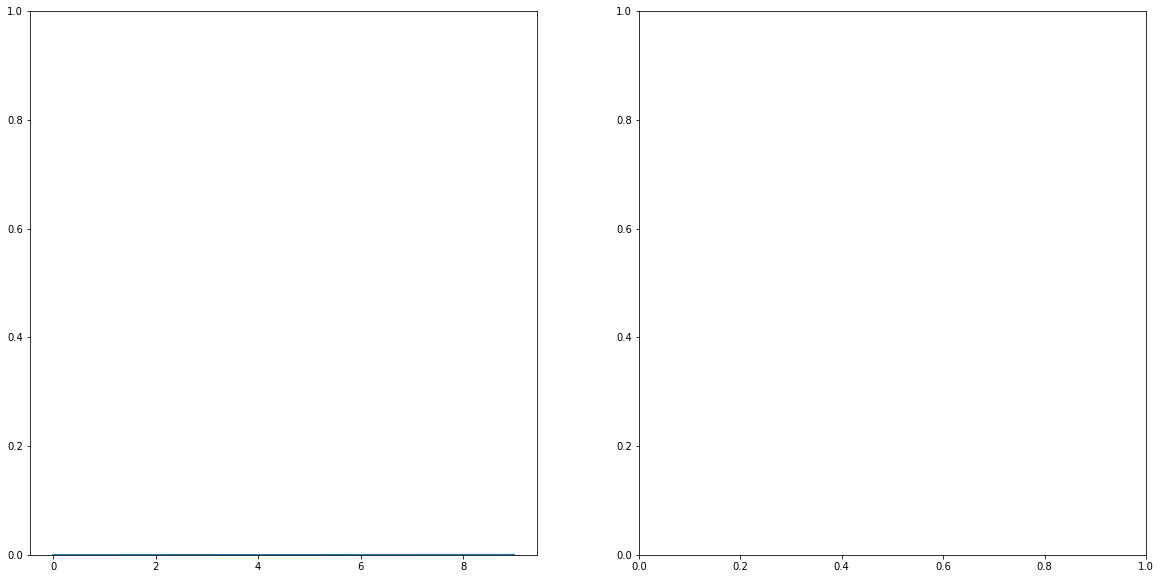

In [11]:
# Manuell testing
num_nodes = 3
no_dofs = num_nodes*3
num_elements = num_nodes -1
#model = SimplySupportedBeamModel_new(num_nodes)

model = CantileverWithEndMoment(num_nodes)


# Setting coordinates for model
L_el = model.L_total / num_elements

coords = np.zeros((num_nodes,2))

for i in range(num_nodes):
    coords[i,0] = i * L_el # x-verdier
    # y verdier er allerede 0

u0 = np.zeros(no_dofs)

q = model.get_incremental_load()
K0 = model.get_K_sys(u0)

lam = 0
d_lam = 0.00001
steps = 1
u = u0
for i in range(steps):
    du = np.linalg.solve(K0, q)*d_lam
    u = u + du
    lam += d_lam


# Starting subplot:
fig, (ax, ax_shape) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

x = np.zeros(num_nodes)
y = np.zeros(num_nodes)

for i in range(num_nodes):    
    x[i] = u[0 + i * 3] + coords[i, 0]
    y[i] = u[1 + i * 3] + coords[i, 1]


print("Total displacements: \n", u)
print("------------------------------------------------------------------------------------")
x_displacements = [u[0 + i*3] for i in range(num_nodes)]
print("x displacements", x_displacements)
y_displacements = [u[1 + i*3] for i in range(num_nodes)]
print("y displacements", x_displacements)
print("------------------------------------------------------------------------------------")
print("Internal forces\n", model.get_internal_forces(u))
print("------------------------------------------------------------------------------------")
print("External load\n", model.get_external_load(lam))
print("------------------------------------------------------------------------------------")
print("Internal forces\n", model.get_internal_forces(u))
print("------------------------------------------------------------------------------------")
print("Residual\n", model.get_residual(lam, u))
print("------------------------------------------------------------------------------------")
print("Stiffness matrix \n", model.get_K_sys(u0))

ax.set_ylim([0, 1])
ax.plot(x, y)

#print("system matrix", model.get_K_sys(u0))

In [16]:
# Solve with arclength
import SolverAlgorithms as algs
num_nodes = 3
no_dofs = num_nodes*3
num_elements = num_nodes -1

algs.solveArchLength_copy(model,arcLength=0.01,max_steps=100)

#model = SimplySupportedBeamModel_new(num_nodes)


Deformert elementvektor [-0.  0.  0.  0.  0.  0.]
Deformert elementvektor [-0.  0.  0.  0.  0.  0.]
Deformert elementvektor [-0.  0.  0.  0.  0.  0.]
Deformert elementvektor [-0.  0.  0.  0.  0.  0.]
i =  0  0 dotV= 0.0e+00 dLambda=   3.3e-04 Lambda=   3.334e-04 u =[   2.095e-03    9.426e-03],  r = [   0.000e+00    0.000e+00]
Deformert elementvektor [-3.08510522e-07  0.00000000e+00 -5.23671217e-04  3.08510522e-07
  0.00000000e+00  5.23671313e-04]
Deformert elementvektor [-2.77659318e-06  0.00000000e+00 -5.23669973e-04  2.77659318e-06
  0.00000000e+00  5.23672558e-04]
Deformert elementvektor [-3.08510522e-07  0.00000000e+00 -5.23671217e-04  3.08510522e-07
  0.00000000e+00  5.23671313e-04]
Deformert elementvektor [-2.77659318e-06  0.00000000e+00 -5.23669973e-04  2.77659318e-06
  0.00000000e+00  5.23672558e-04]
Deformert elementvektor [-3.08510522e-07  0.00000000e+00 -5.23671217e-04  3.08510522e-07
  0.00000000e+00  5.23671313e-04]
Deformert elementvektor [-2.77659318e-06  0.00000000e+00 

Deformert elementvektor [-0.          0.         -0.00157101  0.          0.          0.00157101]
Deformert elementvektor [ 3.37507799e-14  0.00000000e+00 -1.57101469e-03 -3.37507799e-14
  0.00000000e+00  1.57101531e-03]
i =  2  4 dotV= 3.0e-01 dLambda=  -1.1e-09 Lambda=   1.000e-03 u =[   6.284e-03    2.828e-02],  r = [   7.731e-12    9.681e-04]
Deformert elementvektor [-0.          0.         -0.00157101  0.          0.          0.00157101]
Deformert elementvektor [-2.17603713e-14  0.00000000e+00 -1.57101423e-03  2.17603713e-14
  0.00000000e+00  1.57101423e-03]
Deformert elementvektor [-0.          0.         -0.00157101  0.          0.          0.00157101]
Deformert elementvektor [-2.17603713e-14  0.00000000e+00 -1.57101423e-03  2.17603713e-14
  0.00000000e+00  1.57101423e-03]
Deformert elementvektor [-0.          0.         -0.00157101  0.          0.          0.00157101]
Deformert elementvektor [-2.17603713e-14  0.00000000e+00 -1.57101423e-03  2.17603713e-14
  0.00000000e+00  1.57

Deformert elementvektor [-0.          0.         -0.00261836  0.          0.          0.00261836]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -2.61835901e-03 -4.44089210e-16
  0.00000000e+00  2.61835901e-03]
i =  5  0 dotV= 3.0e-01 dLambda=   3.3e-04 Lambda=   2.000e-03 u =[   1.257e-02    5.656e-02],  r = [   7.276e-12   -4.427e-09]
Deformert elementvektor [-3.08511932e-07  0.00000000e+00 -3.14203142e-03  3.08511932e-07
  0.00000000e+00  3.14203152e-03]
Deformert elementvektor [-2.77660586e-06  0.00000000e+00 -3.14203018e-03  2.77660586e-06
  0.00000000e+00  3.14203276e-03]
Deformert elementvektor [-3.08511932e-07  0.00000000e+00 -3.14203142e-03  3.08511932e-07
  0.00000000e+00  3.14203152e-03]
Deformert elementvektor [-2.77660586e-06  0.00000000e+00 -3.14203018e-03  2.77660586e-06
  0.00000000e+00  3.14203276e-03]
Deformert elementvektor [-3.08511932e-07  0.00000000e+00 -3.14203142e-03  3.08511932e-07
  0.00000000e+00  3.14203152e-03]
Deformert elementvektor [-2.77660586

Deformert elementvektor [-0.          0.         -0.00366571  0.          0.          0.00366571]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -3.66570624e-03 -4.44089210e-16
  0.00000000e+00  3.66570624e-03]
Deformert elementvektor [-0.          0.         -0.00366571  0.          0.          0.00366571]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -3.66570624e-03 -4.44089210e-16
  0.00000000e+00  3.66570624e-03]
i =  6 14 dotV= 3.0e-01 dLambda=   9.2e-15 Lambda=   2.334e-03 u =[   1.466e-02    6.598e-02],  r = [   2.728e-11   -6.204e-09]
Deformert elementvektor [-0.          0.         -0.00366571  0.          0.          0.00366571]
Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -3.66570624e-03  4.44089210e-16
  0.00000000e+00  3.66570624e-03]
Deformert elementvektor [-0.          0.         -0.00366571  0.          0.          0.00366571]
Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -3.66570624e-03  4.44089210e-16
  0.00000000e+00  3.66

Deformert elementvektor [-0.          0.         -0.00523673  0.          0.          0.00523673]
Deformert elementvektor [-0.          0.         -0.00523673  0.          0.          0.00523673]
i = 10  0 dotV= 3.0e-01 dLambda=   3.3e-04 Lambda=   3.667e-03 u =[   2.304e-02    1.037e-01],  r = [   1.819e-12    1.091e-11]
Deformert elementvektor [-3.08516160e-07  0.00000000e+00 -5.76040937e-03  3.08516160e-07
  0.00000000e+00  5.76040947e-03]
Deformert elementvektor [-2.77664392e-06  0.00000000e+00 -5.76040813e-03  2.77664392e-06
  0.00000000e+00  5.76041071e-03]
Deformert elementvektor [-3.08516160e-07  0.00000000e+00 -5.76040937e-03  3.08516160e-07
  0.00000000e+00  5.76040947e-03]
Deformert elementvektor [-2.77664392e-06  0.00000000e+00 -5.76040813e-03  2.77664392e-06
  0.00000000e+00  5.76041071e-03]
Deformert elementvektor [-3.08516160e-07  0.00000000e+00 -5.76040937e-03  3.08516160e-07
  0.00000000e+00  5.76040947e-03]
Deformert elementvektor [-2.77664392e-06  0.00000000e+00 -5.7

Deformert elementvektor [-3.82636145e-11  0.00000000e+00 -7.85515625e-03  3.82636145e-11
  0.00000000e+00  7.85515543e-03]
Deformert elementvektor [ 6.06664763e-09  0.00000000e+00 -7.85507484e-03 -6.06664763e-09
  0.00000000e+00  7.85499505e-03]
Deformert elementvektor [-3.82636145e-11  0.00000000e+00 -7.85515625e-03  3.82636145e-11
  0.00000000e+00  7.85515543e-03]
Deformert elementvektor [ 6.06664763e-09  0.00000000e+00 -7.85507484e-03 -6.06664763e-09
  0.00000000e+00  7.85499505e-03]
i = 14  3 dotV= 3.0e-01 dLambda=   2.7e-07 Lambda=   5.001e-03 u =[   3.142e-02    1.414e-01],  r = [   1.717e-07   -1.850e-01]
Deformert elementvektor [ 4.08562073e-14  0.00000000e+00 -7.85511519e-03 -4.08562073e-14
  0.00000000e+00  7.85511502e-03]
Deformert elementvektor [ 2.06195061e-11  0.00000000e+00 -7.85519215e-03 -2.06195061e-11
  0.00000000e+00  7.85526944e-03]
Deformert elementvektor [ 4.08562073e-14  0.00000000e+00 -7.85511519e-03 -4.08562073e-14
  0.00000000e+00  7.85511502e-03]
Deformert e

Deformert elementvektor [-4.89563945e-11  0.00000000e+00 -8.90253690e-03  4.89563945e-11
  0.00000000e+00  8.90253571e-03]
Deformert elementvektor [ 7.78960052e-09  0.00000000e+00 -8.90241841e-03 -7.78960052e-09
  0.00000000e+00  8.90230229e-03]
i = 16  3 dotV= 3.0e-01 dLambda=   4.0e-07 Lambda=   5.668e-03 u =[   3.561e-02    1.602e-01],  r = [   2.496e-07   -2.692e-01]
Deformert elementvektor [ 6.66133815e-14  0.00000000e+00 -8.90247715e-03 -6.66133815e-14
  0.00000000e+00  8.90247692e-03]
Deformert elementvektor [ 3.40074635e-11  0.00000000e+00 -8.90258910e-03 -3.40074635e-11
  0.00000000e+00  8.90270152e-03]
Deformert elementvektor [ 6.66133815e-14  0.00000000e+00 -8.90247715e-03 -6.66133815e-14
  0.00000000e+00  8.90247692e-03]
Deformert elementvektor [ 3.40074635e-11  0.00000000e+00 -8.90258910e-03 -3.40074635e-11
  0.00000000e+00  8.90270152e-03]
Deformert elementvektor [ 6.66133815e-14  0.00000000e+00 -8.90247715e-03 -6.66133815e-14
  0.00000000e+00  8.90247692e-03]
Deformert e

Deformert elementvektor [-6.22271212e-09  0.00000000e+00 -1.09581705e-02  6.22271212e-09
  0.00000000e+00  1.09085954e-02]
i = 20  2 dotV= 3.0e-01 dLambda=   8.8e-05 Lambda=   7.001e-03 u =[   4.399e-02    1.979e-01],  r = [   2.432e-07   -7.730e+01]
Deformert elementvektor [-7.40127959e-11  0.00000000e+00 -1.09973281e-02  7.40127959e-11
  0.00000000e+00  1.09973259e-02]
Deformert elementvektor [ 1.18768773e-08  0.00000000e+00 -1.09971048e-02 -1.18768773e-08
  0.00000000e+00  1.09968860e-02]
Deformert elementvektor [-7.40127959e-11  0.00000000e+00 -1.09973281e-02  7.40127959e-11
  0.00000000e+00  1.09973259e-02]
Deformert elementvektor [ 1.18768773e-08  0.00000000e+00 -1.09971048e-02 -1.18768773e-08
  0.00000000e+00  1.09968860e-02]
Deformert elementvektor [-7.40127959e-11  0.00000000e+00 -1.09973281e-02  7.40127959e-11
  0.00000000e+00  1.09973259e-02]
Deformert elementvektor [ 1.18768773e-08  0.00000000e+00 -1.09971048e-02 -1.18768773e-08
  0.00000000e+00  1.09968860e-02]
i = 20  3 d

Deformert elementvektor [-0.          0.         -0.01256837  0.          0.          0.01256837]
Deformert elementvektor [ 1.02140518e-14  0.00000000e+00 -1.25683650e-02 -1.02140518e-14
  0.00000000e+00  1.25683650e-02]
i = 23  8 dotV= 3.0e-01 dLambda=  -1.7e-11 Lambda=   8.001e-03 u =[   5.027e-02    2.262e-01],  r = [   7.276e-12    1.525e-05]
Deformert elementvektor [-0.          0.         -0.01256837  0.          0.          0.01256837]
Deformert elementvektor [-2.66453526e-15  0.00000000e+00 -1.25683650e-02  2.66453526e-15
  0.00000000e+00  1.25683650e-02]
Deformert elementvektor [-0.          0.         -0.01256837  0.          0.          0.01256837]
Deformert elementvektor [-2.66453526e-15  0.00000000e+00 -1.25683650e-02  2.66453526e-15
  0.00000000e+00  1.25683650e-02]
Deformert elementvektor [-0.          0.         -0.01256837  0.          0.          0.01256837]
Deformert elementvektor [-2.66453526e-15  0.00000000e+00 -1.25683650e-02  2.66453526e-15
  0.00000000e+00  1.25

  0.00000000e+00  1.46622836e-02]
Deformert elementvektor [-1.28812516e-10  0.00000000e+00 -1.46633307e-02  1.28812516e-10
  0.00000000e+00  1.46633255e-02]
Deformert elementvektor [ 2.10756528e-08  0.00000000e+00 -1.46628019e-02 -2.10756528e-08
  0.00000000e+00  1.46622836e-02]
Deformert elementvektor [-1.28812516e-10  0.00000000e+00 -1.46633307e-02  1.28812516e-10
  0.00000000e+00  1.46633255e-02]
Deformert elementvektor [ 2.10756528e-08  0.00000000e+00 -1.46628019e-02 -2.10756528e-08
  0.00000000e+00  1.46622836e-02]
i = 27  3 dotV= 3.0e-01 dLambda=   1.8e-06 Lambda=   9.336e-03 u =[   5.865e-02    2.639e-01],  r = [   1.106e-06   -1.200e+00]
Deformert elementvektor [ 4.38316050e-13  0.00000000e+00 -1.46630647e-02 -4.38316050e-13
  0.00000000e+00  1.46630637e-02]
Deformert elementvektor [ 2.49661625e-10  0.00000000e+00 -1.46635620e-02 -2.49661625e-10
  0.00000000e+00  1.46640613e-02]
Deformert elementvektor [ 4.38316050e-13  0.00000000e+00 -1.46630647e-02 -4.38316050e-13
  0.0000000

Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -1.62343431e-02  4.44089210e-16
  0.00000000e+00  1.62343431e-02]
Deformert elementvektor [-0.          0.         -0.01623434  0.          0.          0.01623434]
Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -1.62343431e-02  4.44089210e-16
  0.00000000e+00  1.62343431e-02]
i = 30 12 dotV= 3.0e-01 dLambda=  -4.0e-14 Lambda=   1.034e-02 u =[   6.494e-02    2.921e-01],  r = [   8.731e-11    2.707e-08]
Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -1.62343431e-02  4.44089210e-16
  0.00000000e+00  1.62343431e-02]
Deformert elementvektor [ 1.33226763e-15  0.00000000e+00 -1.62343431e-02 -1.33226763e-15
  0.00000000e+00  1.62343431e-02]
Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -1.62343431e-02  4.44089210e-16
  0.00000000e+00  1.62343431e-02]
Deformert elementvektor [ 1.33226763e-15  0.00000000e+00 -1.62343431e-02 -1.33226763e-15
  0.00000000e+00  1.62343431e-02]
Deformert elementvektor [-4.44089210

Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -1.72817919e-02 -4.44089210e-16
  0.00000000e+00  1.72817919e-02]
Deformert elementvektor [-0.          0.         -0.01728179  0.          0.          0.01728179]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -1.72817919e-02 -4.44089210e-16
  0.00000000e+00  1.72817919e-02]
Deformert elementvektor [-0.          0.         -0.01728179  0.          0.          0.01728179]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -1.72817919e-02 -4.44089210e-16
  0.00000000e+00  1.72817919e-02]
i = 32 11 dotV= 3.0e-01 dLambda=   1.2e-13 Lambda=   1.100e-02 u =[   6.913e-02    3.110e-01],  r = [  -5.093e-11   -9.488e-08]
Deformert elementvektor [-0.          0.         -0.01728179  0.          0.          0.01728179]
Deformert elementvektor [-0.          0.         -0.01728179  0.          0.          0.01728179]
Deformert elementvektor [-0.          0.         -0.01728179  0.          0.          0.01728179]
Deformert ele

Deformert elementvektor [-0.          0.         -0.01885299  0.          0.          0.01885299]
Deformert elementvektor [ 4.4408921e-16  0.0000000e+00 -1.8852990e-02 -4.4408921e-16
  0.0000000e+00  1.8852990e-02]
Deformert elementvektor [-0.          0.         -0.01885299  0.          0.          0.01885299]
Deformert elementvektor [ 4.4408921e-16  0.0000000e+00 -1.8852990e-02 -4.4408921e-16
  0.0000000e+00  1.8852990e-02]
i = 35 12 dotV= 3.0e-01 dLambda=   1.6e-15 Lambda=   1.200e-02 u =[   7.541e-02    3.392e-01],  r = [   3.638e-11    9.185e-09]
Deformert elementvektor [-0.          0.         -0.01885299  0.          0.          0.01885299]
Deformert elementvektor [-4.4408921e-16  0.0000000e+00 -1.8852990e-02  4.4408921e-16
  0.0000000e+00  1.8852990e-02]
Deformert elementvektor [-0.          0.         -0.01885299  0.          0.          0.01885299]
Deformert elementvektor [-4.4408921e-16  0.0000000e+00 -1.8852990e-02  4.4408921e-16
  0.0000000e+00  1.8852990e-02]
Deformert el

i = 38 11 dotV= 3.0e-01 dLambda=   5.6e-13 Lambda=   1.300e-02 u =[   8.170e-02    3.675e-01],  r = [  -2.474e-10   -4.809e-07]
Deformert elementvektor [-0.          0.         -0.02042422  0.          0.          0.02042422]
Deformert elementvektor [-0.          0.         -0.02042422  0.          0.          0.02042422]
Deformert elementvektor [-0.          0.         -0.02042422  0.          0.          0.02042422]
Deformert elementvektor [-0.          0.         -0.02042422  0.          0.          0.02042422]
Deformert elementvektor [-0.          0.         -0.02042422  0.          0.          0.02042422]
Deformert elementvektor [-0.          0.         -0.02042422  0.          0.          0.02042422]
i = 38 12 dotV= 3.0e-01 dLambda=  -4.7e-14 Lambda=   1.300e-02 u =[   8.170e-02    3.675e-01],  r = [   4.366e-11    4.237e-08]
Deformert elementvektor [-0.          0.         -0.02042422  0.          0.          0.02042422]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -

Deformert elementvektor [-0.          0.         -0.02147173  0.          0.          0.02147173]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -2.14717264e-02 -4.44089210e-16
  0.00000000e+00  2.14717264e-02]
i = 40 12 dotV= 3.0e-01 dLambda=  -9.9e-14 Lambda=   1.367e-02 u =[   8.589e-02    3.863e-01],  r = [  -1.019e-10    1.013e-07]
Deformert elementvektor [-0.          0.         -0.02147173  0.          0.          0.02147173]
Deformert elementvektor [-0.          0.         -0.02147173  0.          0.          0.02147173]
Deformert elementvektor [-0.          0.         -0.02147173  0.          0.          0.02147173]
Deformert elementvektor [-0.          0.         -0.02147173  0.          0.          0.02147173]
Deformert elementvektor [-0.          0.         -0.02147173  0.          0.          0.02147173]
Deformert elementvektor [-0.          0.         -0.02147173  0.          0.          0.02147173]
i = 40 13 dotV= 3.0e-01 dLambda=  -2.8e-14 Lambda=   1.367e-02 

i = 42  2 dotV= 3.0e-01 dLambda=   1.8e-04 Lambda=   1.433e-02 u =[   9.007e-02    4.051e-01],  r = [   2.081e-06   -1.571e+02]
Deformert elementvektor [-2.83755686e-10  0.00000000e+00 -2.25197466e-02  2.83755686e-10
  0.00000000e+00  2.25197275e-02]
Deformert elementvektor [ 4.94214945e-08  0.00000000e+00 -2.25178357e-02 -4.94214945e-08
  0.00000000e+00  2.25159631e-02]
Deformert elementvektor [-2.83755686e-10  0.00000000e+00 -2.25197466e-02  2.83755686e-10
  0.00000000e+00  2.25197275e-02]
Deformert elementvektor [ 4.94214945e-08  0.00000000e+00 -2.25178357e-02 -4.94214945e-08
  0.00000000e+00  2.25159631e-02]
Deformert elementvektor [-2.83755686e-10  0.00000000e+00 -2.25197466e-02  2.83755686e-10
  0.00000000e+00  2.25197275e-02]
Deformert elementvektor [ 4.94214945e-08  0.00000000e+00 -2.25178357e-02 -4.94214945e-08
  0.00000000e+00  2.25159631e-02]
i = 42  3 dotV= 3.0e-01 dLambda=   6.4e-06 Lambda=   1.434e-02 u =[   9.008e-02    4.051e-01],  r = [   3.939e-06   -4.328e+00]
Deform

Deformert elementvektor [-1.37318201e-09  0.00000000e+00 -2.35970443e-02  1.37318201e-09
  0.00000000e+00  2.35931104e-02]
Deformert elementvektor [-2.85427890e-08  0.00000000e+00 -2.34831857e-02  2.85427890e-08
  0.00000000e+00  2.33771949e-02]
i = 44  2 dotV= 3.0e-01 dLambda=   1.8e-04 Lambda=   1.500e-02 u =[   9.426e-02    4.239e-01],  r = [   2.384e-06   -1.643e+02]
Deformert elementvektor [-3.07172954e-10  0.00000000e+00 -2.35673584e-02  3.07172954e-10
  0.00000000e+00  2.35673365e-02]
Deformert elementvektor [ 5.40744689e-08  0.00000000e+00 -2.35651692e-02 -5.40744689e-08
  0.00000000e+00  2.35630238e-02]
Deformert elementvektor [-3.07172954e-10  0.00000000e+00 -2.35673584e-02  3.07172954e-10
  0.00000000e+00  2.35673365e-02]
Deformert elementvektor [ 5.40744689e-08  0.00000000e+00 -2.35651692e-02 -5.40744689e-08
  0.00000000e+00  2.35630238e-02]
Deformert elementvektor [-3.07172954e-10  0.00000000e+00 -2.35673584e-02  3.07172954e-10
  0.00000000e+00  2.35673365e-02]
Deformert e

Deformert elementvektor [-0.          0.         -0.02409056  0.          0.          0.02409056]
Deformert elementvektor [-0.          0.         -0.02409056  0.          0.          0.02409056]
i = 46  0 dotV= 3.0e-01 dLambda=   3.3e-04 Lambda=   1.567e-02 u =[   9.846e-02    4.427e-01],  r = [  -6.548e-11    6.386e-10]
Deformert elementvektor [-3.08629858e-07  0.00000000e+00 -2.46143367e-02  3.08629858e-07
  0.00000000e+00  2.46143368e-02]
Deformert elementvektor [-2.77766720e-06  0.00000000e+00 -2.46143355e-02  2.77766720e-06
  0.00000000e+00  2.46143381e-02]
Deformert elementvektor [-3.08629858e-07  0.00000000e+00 -2.46143367e-02  3.08629858e-07
  0.00000000e+00  2.46143368e-02]
Deformert elementvektor [-2.77766720e-06  0.00000000e+00 -2.46143355e-02  2.77766720e-06
  0.00000000e+00  2.46143381e-02]
Deformert elementvektor [-3.08629858e-07  0.00000000e+00 -2.46143367e-02  3.08629858e-07
  0.00000000e+00  2.46143368e-02]
Deformert elementvektor [-2.77766720e-06  0.00000000e+00 -2.4

Deformert elementvektor [-6.98552327e-13  0.00000000e+00 -2.56619207e-02  6.98552327e-13
  0.00000000e+00  2.56619208e-02]
i = 48  9 dotV= 3.0e-01 dLambda=  -2.8e-10 Lambda=   1.634e-02 u =[   1.026e-01    4.616e-01],  r = [   8.731e-11    2.330e-04]
Deformert elementvektor [-0.          0.         -0.02566192  0.          0.          0.02566192]
Deformert elementvektor [-8.43769499e-14  0.00000000e+00 -2.56619206e-02  8.43769499e-14
  0.00000000e+00  2.56619205e-02]
Deformert elementvektor [-0.          0.         -0.02566192  0.          0.          0.02566192]
Deformert elementvektor [-8.43769499e-14  0.00000000e+00 -2.56619206e-02  8.43769499e-14
  0.00000000e+00  2.56619205e-02]
Deformert elementvektor [-0.          0.         -0.02566192  0.          0.          0.02566192]
Deformert elementvektor [-8.43769499e-14  0.00000000e+00 -2.56619206e-02  8.43769499e-14
  0.00000000e+00  2.56619205e-02]
i = 48 10 dotV= 3.0e-01 dLambda=   4.1e-11 Lambda=   1.634e-02 u =[   1.026e-01    4.6

i = 51  9 dotV= 3.0e-01 dLambda=  -4.8e-10 Lambda=   1.734e-02 u =[   1.089e-01    4.898e-01],  r = [   3.201e-10    3.933e-04]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -2.72333204e-02 -4.44089210e-16
  0.00000000e+00  2.72333204e-02]
Deformert elementvektor [-1.52322599e-13  0.00000000e+00 -2.72333203e-02  1.52322599e-13
  0.00000000e+00  2.72333203e-02]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -2.72333204e-02 -4.44089210e-16
  0.00000000e+00  2.72333204e-02]
Deformert elementvektor [-1.52322599e-13  0.00000000e+00 -2.72333203e-02  1.52322599e-13
  0.00000000e+00  2.72333203e-02]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -2.72333204e-02 -4.44089210e-16
  0.00000000e+00  2.72333204e-02]
Deformert elementvektor [-1.52322599e-13  0.00000000e+00 -2.72333203e-02  1.52322599e-13
  0.00000000e+00  2.72333203e-02]
i = 51 10 dotV= 3.0e-01 dLambda=   6.6e-11 Lambda=   1.734e-02 u =[   1.089e-01    4.898e-01],  r = [  -1.601e-10   -6.480e-05]
Deform

Deformert elementvektor [-2.20268248e-13  0.00000000e+00 -2.82809455e-02  2.20268248e-13
  0.00000000e+00  2.82809455e-02]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -2.82809456e-02 -4.44089210e-16
  0.00000000e+00  2.82809456e-02]
Deformert elementvektor [-2.20268248e-13  0.00000000e+00 -2.82809455e-02  2.20268248e-13
  0.00000000e+00  2.82809455e-02]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -2.82809456e-02 -4.44089210e-16
  0.00000000e+00  2.82809456e-02]
Deformert elementvektor [-2.20268248e-13  0.00000000e+00 -2.82809455e-02  2.20268248e-13
  0.00000000e+00  2.82809455e-02]
i = 53 10 dotV= 3.0e-01 dLambda=   8.8e-11 Lambda=   1.800e-02 u =[   1.131e-01    5.086e-01],  r = [  -8.731e-11   -8.782e-05]
Deformert elementvektor [-0.          0.         -0.02828095  0.          0.          0.02828095]
Deformert elementvektor [ 3.50830476e-14  0.00000000e+00 -2.82809456e-02 -3.50830476e-14
  0.00000000e+00  2.82809456e-02]
Deformert elementvektor [-0.        

  0.00000000e+00  2.93290224e-02]
Deformert elementvektor [ 5.55555602e-13  0.00000000e+00 -2.93285281e-02 -5.55555602e-13
  0.00000000e+00  2.93285282e-02]
Deformert elementvektor [-2.44969511e-09  0.00000000e+00 -2.93287753e-02  2.44969511e-09
  0.00000000e+00  2.93290224e-02]
i = 55  5 dotV= 3.0e-01 dLambda=  -6.3e-07 Lambda=   1.867e-02 u =[   1.173e-01    5.274e-01],  r = [   6.199e-09    4.754e-01]
Deformert elementvektor [-1.77635684e-14  0.00000000e+00 -2.93286210e-02  1.77635684e-14
  0.00000000e+00  2.93286210e-02]
Deformert elementvektor [-1.97620587e-10  0.00000000e+00 -2.93285088e-02  1.97620587e-10
  0.00000000e+00  2.93283965e-02]
Deformert elementvektor [-1.77635684e-14  0.00000000e+00 -2.93286210e-02  1.77635684e-14
  0.00000000e+00  2.93286210e-02]
Deformert elementvektor [-1.97620587e-10  0.00000000e+00 -2.93285088e-02  1.97620587e-10
  0.00000000e+00  2.93283965e-02]
Deformert elementvektor [-1.77635684e-14  0.00000000e+00 -2.93286210e-02  1.77635684e-14
  0.0000000

Deformert elementvektor [-0.          0.         -0.02985242  0.          0.          0.02985242]
Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -2.98524234e-02  4.44089210e-16
  0.00000000e+00  2.98524234e-02]
Deformert elementvektor [-0.          0.         -0.02985242  0.          0.          0.02985242]
i = 56 29 dotV= 3.0e-01 dLambda=  -1.2e-14 Lambda=   1.900e-02 u =[   1.194e-01    5.368e-01],  r = [  -1.164e-10    4.348e-11]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -2.98524234e-02 -4.44089210e-16
  0.00000000e+00  2.98524234e-02]
Deformert elementvektor [-0.          0.         -0.02985242  0.          0.          0.02985242]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -2.98524234e-02 -4.44089210e-16
  0.00000000e+00  2.98524234e-02]
Deformert elementvektor [-0.          0.         -0.02985242  0.          0.          0.02985242]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -2.98524234e-02 -4.44089210e-16
  0.00000000e+00  2.98

Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -3.09001031e-02  4.44089210e-16
  0.00000000e+00  3.09001031e-02]
Deformert elementvektor [-0.         0.        -0.0309001  0.         0.         0.0309001]
Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -3.09001031e-02  4.44089210e-16
  0.00000000e+00  3.09001031e-02]
Deformert elementvektor [-0.         0.        -0.0309001  0.         0.         0.0309001]
Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -3.09001031e-02  4.44089210e-16
  0.00000000e+00  3.09001031e-02]
i = 58 18 dotV= 3.0e-01 dLambda=  -2.0e-15 Lambda=   1.967e-02 u =[   1.236e-01    5.556e-01],  r = [   8.731e-11   -1.594e-08]
Deformert elementvektor [-0.         0.        -0.0309001  0.         0.         0.0309001]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -3.09001031e-02 -4.44089210e-16
  0.00000000e+00  3.09001031e-02]
Deformert elementvektor [-0.         0.        -0.0309001  0.         0.         0.0309001]
Deformert el

Deformert elementvektor [-7.19424520e-13  0.00000000e+00 -3.19478058e-02  7.19424520e-13
  0.00000000e+00  3.19478056e-02]
Deformert elementvektor [-0.          0.         -0.03194781  0.          0.          0.03194781]
Deformert elementvektor [-7.19424520e-13  0.00000000e+00 -3.19478058e-02  7.19424520e-13
  0.00000000e+00  3.19478056e-02]
Deformert elementvektor [-0.          0.         -0.03194781  0.          0.          0.03194781]
Deformert elementvektor [-7.19424520e-13  0.00000000e+00 -3.19478058e-02  7.19424520e-13
  0.00000000e+00  3.19478056e-02]
i = 60 10 dotV= 3.0e-01 dLambda=   2.2e-10 Lambda=   2.034e-02 u =[   1.278e-01    5.744e-01],  r = [   3.056e-10   -2.280e-04]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -3.19478059e-02 -4.44089210e-16
  0.00000000e+00  3.19478059e-02]
Deformert elementvektor [ 1.02584607e-13  0.00000000e+00 -3.19478059e-02 -1.02584607e-13
  0.00000000e+00  3.19478058e-02]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -3.1

Deformert elementvektor [-3.99680289e-14  0.00000000e+00 -3.29955833e-02  3.99680289e-14
  0.00000000e+00  3.29955833e-02]
Deformert elementvektor [-3.96577882e-10  0.00000000e+00 -3.29953869e-02  3.96577882e-10
  0.00000000e+00  3.29951904e-02]
i = 62  6 dotV= 3.0e-01 dLambda=   3.0e-07 Lambda=   2.101e-02 u =[   1.320e-01    5.932e-01],  r = [   4.220e-10   -2.888e-01]
Deformert elementvektor [-4.4408921e-15  0.0000000e+00 -3.2995539e-02  4.4408921e-15
  0.0000000e+00  3.2995539e-02]
Deformert elementvektor [ 1.34996458e-10  0.00000000e+00 -3.29955141e-02 -1.34996458e-10
  0.00000000e+00  3.29954891e-02]
Deformert elementvektor [-4.4408921e-15  0.0000000e+00 -3.2995539e-02  4.4408921e-15
  0.0000000e+00  3.2995539e-02]
Deformert elementvektor [ 1.34996458e-10  0.00000000e+00 -3.29955141e-02 -1.34996458e-10
  0.00000000e+00  3.29954891e-02]
Deformert elementvektor [-4.4408921e-15  0.0000000e+00 -3.2995539e-02  4.4408921e-15
  0.0000000e+00  3.2995539e-02]
Deformert elementvektor [ 1.3

Deformert elementvektor [-0.          0.         -0.03404328  0.          0.          0.03404328]
Deformert elementvektor [ 8.88178420e-16  0.00000000e+00 -3.40432839e-02 -8.88178420e-16
  0.00000000e+00  3.40432839e-02]
i = 64 16 dotV= 3.0e-01 dLambda=   5.1e-14 Lambda=   2.167e-02 u =[   1.362e-01    6.120e-01],  r = [  -1.455e-11   -6.822e-09]
Deformert elementvektor [-0.          0.         -0.03404328  0.          0.          0.03404328]
Deformert elementvektor [-0.          0.         -0.03404328  0.          0.          0.03404328]
Deformert elementvektor [-0.          0.         -0.03404328  0.          0.          0.03404328]
Deformert elementvektor [-0.          0.         -0.03404328  0.          0.          0.03404328]
Deformert elementvektor [-0.          0.         -0.03404328  0.          0.          0.03404328]
Deformert elementvektor [-0.          0.         -0.03404328  0.          0.          0.03404328]
i = 64 17 dotV= 3.0e-01 dLambda=  -8.4e-14 Lambda=   2.167e-02 

Deformert elementvektor [-0.          0.         -0.03456717  0.          0.          0.03456717]
Deformert elementvektor [ 4.4408921e-16  0.0000000e+00 -3.4567169e-02 -4.4408921e-16
  0.0000000e+00  3.4567169e-02]
i = 65 29 dotV= 3.0e-01 dLambda=   8.5e-14 Lambda=   2.201e-02 u =[   1.383e-01    6.213e-01],  r = [   1.310e-10   -5.794e-08]
Deformert elementvektor [-0.          0.         -0.03456717  0.          0.          0.03456717]
Deformert elementvektor [-0.          0.         -0.03456717  0.          0.          0.03456717]
Deformert elementvektor [-0.          0.         -0.03456717  0.          0.          0.03456717]
Deformert elementvektor [-0.          0.         -0.03456717  0.          0.          0.03456717]
Deformert elementvektor [-0.          0.         -0.03456717  0.          0.          0.03456717]
Deformert elementvektor [-0.          0.         -0.03456717  0.          0.          0.03456717]
i = 66  0 dotV= 3.0e-01 dLambda=   3.3e-04 Lambda=   2.234e-02 u =[  

Deformert elementvektor [ 2.23281393e-10  0.00000000e+00 -3.61388291e-02 -2.23281393e-10
  0.00000000e+00  3.61387825e-02]
Deformert elementvektor [-5.32907052e-15  0.00000000e+00 -3.61388756e-02  5.32907052e-15
  0.00000000e+00  3.61388756e-02]
Deformert elementvektor [ 2.23281393e-10  0.00000000e+00 -3.61388291e-02 -2.23281393e-10
  0.00000000e+00  3.61387825e-02]
Deformert elementvektor [-5.32907052e-15  0.00000000e+00 -3.61388756e-02  5.32907052e-15
  0.00000000e+00  3.61388756e-02]
Deformert elementvektor [ 2.23281393e-10  0.00000000e+00 -3.61388291e-02 -2.23281393e-10
  0.00000000e+00  3.61387825e-02]
i = 68  7 dotV= 3.0e-01 dLambda=   1.0e-07 Lambda=   2.301e-02 u =[   1.446e-01    6.495e-01],  r = [   1.019e-10   -8.246e-02]
Deformert elementvektor [-0.          0.         -0.03613886  0.          0.          0.03613886]
Deformert elementvektor [ 4.22053503e-11  0.00000000e+00 -3.61388724e-02 -4.22053503e-11
  0.00000000e+00  3.61388843e-02]
Deformert elementvektor [-0.        

Deformert elementvektor [-0.          0.         -0.03718669  0.          0.          0.03718669]
Deformert elementvektor [-0.          0.         -0.03718669  0.          0.          0.03718669]
i = 70 17 dotV= 3.0e-01 dLambda=   4.3e-14 Lambda=   2.367e-02 u =[   1.487e-01    6.683e-01],  r = [   1.310e-10   -3.884e-08]
Deformert elementvektor [-0.          0.         -0.03718669  0.          0.          0.03718669]
Deformert elementvektor [-0.          0.         -0.03718669  0.          0.          0.03718669]
Deformert elementvektor [-0.          0.         -0.03718669  0.          0.          0.03718669]
Deformert elementvektor [-0.          0.         -0.03718669  0.          0.          0.03718669]
Deformert elementvektor [-0.          0.         -0.03718669  0.          0.          0.03718669]
Deformert elementvektor [-0.          0.         -0.03718669  0.          0.          0.03718669]
i = 71  0 dotV= 3.0e-01 dLambda=   3.3e-04 Lambda=   2.401e-02 u =[   1.508e-01    6.777

Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -3.82345511e-02  4.44089210e-16
  0.00000000e+00  3.82345511e-02]
Deformert elementvektor [-0.          0.         -0.03823455  0.          0.          0.03823455]
Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -3.82345511e-02  4.44089210e-16
  0.00000000e+00  3.82345511e-02]
Deformert elementvektor [-0.          0.         -0.03823455  0.          0.          0.03823455]
Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -3.82345511e-02  4.44089210e-16
  0.00000000e+00  3.82345511e-02]
i = 72 24 dotV= 3.0e-01 dLambda=  -9.3e-14 Lambda=   2.434e-02 u =[   1.529e-01    6.870e-01],  r = [  -1.892e-10    6.291e-08]
Deformert elementvektor [-0.          0.         -0.03823455  0.          0.          0.03823455]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -3.82345511e-02 -4.44089210e-16
  0.00000000e+00  3.82345511e-02]
Deformert elementvektor [-0.          0.         -0.03823455  0.          0.          

  0.00000000e+00  3.92824372e-02]
Deformert elementvektor [-0.          0.         -0.03928244  0.          0.          0.03928244]
Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -3.92824372e-02  4.44089210e-16
  0.00000000e+00  3.92824372e-02]
Deformert elementvektor [-0.          0.         -0.03928244  0.          0.          0.03928244]
i = 74 21 dotV= 3.0e-01 dLambda=  -8.9e-15 Lambda=   2.501e-02 u =[   1.571e-01    7.058e-01],  r = [   7.276e-11    1.163e-09]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -3.92824372e-02 -4.44089210e-16
  0.00000000e+00  3.92824372e-02]
Deformert elementvektor [-0.          0.         -0.03928244  0.          0.          0.03928244]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -3.92824372e-02 -4.44089210e-16
  0.00000000e+00  3.92824372e-02]
Deformert elementvektor [-0.          0.         -0.03928244  0.          0.          0.03928244]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -3.92824372e-02 -4.4

  0.00000000e+00  4.08571526e-02]
Deformert elementvektor [ 1.58923279e-07  0.00000000e+00 -4.08459676e-02 -1.58923279e-07
  0.00000000e+00  4.08348959e-02]
i = 77  3 dotV= 3.0e-01 dLambda=   3.7e-05 Lambda=   2.603e-02 u =[   1.634e-01    7.339e-01],  r = [   2.193e-05   -2.538e+01]
Deformert elementvektor [-2.66986433e-12  0.00000000e+00 -4.08517197e-02  2.66986433e-12
  0.00000000e+00  4.08517043e-02]
Deformert elementvektor [ 1.46488359e-08  0.00000000e+00 -4.08617983e-02 -1.46488359e-08
  0.00000000e+00  4.08719077e-02]
Deformert elementvektor [-2.66986433e-12  0.00000000e+00 -4.08517197e-02  2.66986433e-12
  0.00000000e+00  4.08517043e-02]
Deformert elementvektor [ 1.46488359e-08  0.00000000e+00 -4.08617983e-02 -1.46488359e-08
  0.00000000e+00  4.08719077e-02]
Deformert elementvektor [-2.66986433e-12  0.00000000e+00 -4.08517197e-02  2.66986433e-12
  0.00000000e+00  4.08517043e-02]
Deformert elementvektor [ 1.46488359e-08  0.00000000e+00 -4.08617983e-02 -1.46488359e-08
  0.0000000

Deformert elementvektor [-0.         0.        -0.0413783  0.         0.         0.0413783]
Deformert elementvektor [-0.         0.        -0.0413783  0.         0.         0.0413783]
Deformert elementvektor [-0.         0.        -0.0413783  0.         0.         0.0413783]
Deformert elementvektor [-0.         0.        -0.0413783  0.         0.         0.0413783]
i = 78 27 dotV= 3.0e-01 dLambda=   9.7e-14 Lambda=   2.634e-02 u =[   1.655e-01    7.433e-01],  r = [   2.765e-10   -8.886e-08]
Deformert elementvektor [-0.         0.        -0.0413783  0.         0.         0.0413783]
Deformert elementvektor [ 8.88178420e-16  0.00000000e+00 -4.13782979e-02 -8.88178420e-16
  0.00000000e+00  4.13782979e-02]
Deformert elementvektor [-0.         0.        -0.0413783  0.         0.         0.0413783]
Deformert elementvektor [ 8.88178420e-16  0.00000000e+00 -4.13782979e-02 -8.88178420e-16
  0.00000000e+00  4.13782979e-02]
Deformert elementvektor [-0.         0.        -0.0413783  0.         0.  

  0.00000000e+00  4.29502595e-02]
Deformert elementvektor [-2.77992564e-06  0.00000000e+00 -4.29502582e-02  2.77992564e-06
  0.00000000e+00  4.29502608e-02]
Deformert elementvektor [-3.08880797e-07  0.00000000e+00 -4.29502594e-02  3.08880797e-07
  0.00000000e+00  4.29502595e-02]
Deformert elementvektor [-2.77992564e-06  0.00000000e+00 -4.29502582e-02  2.77992564e-06
  0.00000000e+00  4.29502608e-02]
i = 81  1 dotV= 3.0e-01 dLambda=  -3.4e-04 Lambda=   2.700e-02 u =[   1.714e-01    7.715e-01],  r = [  -9.100e-03    1.510e+02]
Deformert elementvektor [-4.52093518e-09  0.00000000e+00 -4.30050885e-02  4.52093518e-09
  0.00000000e+00  4.29979190e-02]
Deformert elementvektor [-9.44856371e-08  0.00000000e+00 -4.27989129e-02  9.44856371e-08
  0.00000000e+00  4.26070763e-02]
Deformert elementvektor [-4.52093518e-09  0.00000000e+00 -4.30050885e-02  4.52093518e-09
  0.00000000e+00  4.29979190e-02]
Deformert elementvektor [-9.44856371e-08  0.00000000e+00 -4.27989129e-02  9.44856371e-08
  0.0000000

Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -4.34742818e-02 -4.44089210e-16
  0.00000000e+00  4.34742818e-02]
Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -4.34742818e-02  4.44089210e-16
  0.00000000e+00  4.34742818e-02]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -4.34742818e-02 -4.44089210e-16
  0.00000000e+00  4.34742818e-02]
i = 82 20 dotV= 3.0e-01 dLambda=   3.7e-14 Lambda=   2.768e-02 u =[   1.739e-01    7.808e-01],  r = [   2.619e-10   -2.452e-08]
Deformert elementvektor [-0.          0.         -0.04347428  0.          0.          0.04347428]
Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -4.34742818e-02  4.44089210e-16
  0.00000000e+00  4.34742818e-02]
Deformert elementvektor [-0.          0.         -0.04347428  0.          0.          0.04347428]
Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -4.34742818e-02  4.44089210e-16
  0.00000000e+00  4.34742818e-02]
Deformert elementvektor [-0.          0.         -0.04347428 

Deformert elementvektor [-0.          0.         -0.04452232  0.          0.          0.04452232]
Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -4.45223218e-02  4.44089210e-16
  0.00000000e+00  4.45223218e-02]
Deformert elementvektor [-0.          0.         -0.04452232  0.          0.          0.04452232]
Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -4.45223218e-02  4.44089210e-16
  0.00000000e+00  4.45223218e-02]
Deformert elementvektor [-0.          0.         -0.04452232  0.          0.          0.04452232]
Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -4.45223218e-02  4.44089210e-16
  0.00000000e+00  4.45223218e-02]
i = 84 23 dotV= 3.0e-01 dLambda=  -1.1e-13 Lambda=   2.834e-02 u =[   1.781e-01    7.996e-01],  r = [  -5.675e-10    7.257e-08]
Deformert elementvektor [-0.          0.         -0.04452232  0.          0.          0.04452232]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -4.45223218e-02 -4.44089210e-16
  0.00000000e+00  4.45

Deformert elementvektor [ 7.63157537e-10  0.00000000e+00 -4.55702286e-02 -7.63157537e-10
  0.00000000e+00  4.55700041e-02]
i = 86  7 dotV= 3.0e-01 dLambda=   4.7e-07 Lambda=   2.901e-02 u =[   1.823e-01    8.183e-01],  r = [   2.328e-10   -3.912e-01]
Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -4.55703827e-02  4.44089210e-16
  0.00000000e+00  4.55703827e-02]
Deformert elementvektor [ 2.52179611e-10  0.00000000e+00 -4.55704302e-02 -2.52179611e-10
  0.00000000e+00  4.55704776e-02]
Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -4.55703827e-02  4.44089210e-16
  0.00000000e+00  4.55703827e-02]
Deformert elementvektor [ 2.52179611e-10  0.00000000e+00 -4.55704302e-02 -2.52179611e-10
  0.00000000e+00  4.55704776e-02]
Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -4.55703827e-02  4.44089210e-16
  0.00000000e+00  4.55703827e-02]
Deformert elementvektor [ 2.52179611e-10  0.00000000e+00 -4.55704302e-02 -2.52179611e-10
  0.00000000e+00  4.55704776e-02]
i = 86  8 d

Deformert elementvektor [-0.          0.         -0.04609444  0.          0.          0.04609444]
Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -4.60944442e-02  4.44089210e-16
  0.00000000e+00  4.60944442e-02]
i = 87 24 dotV= 3.0e-01 dLambda=  -5.9e-14 Lambda=   2.934e-02 u =[   1.844e-01    8.276e-01],  r = [  -7.276e-11    2.781e-08]
Deformert elementvektor [-0.          0.         -0.04609444  0.          0.          0.04609444]
Deformert elementvektor [-0.          0.         -0.04609444  0.          0.          0.04609444]
Deformert elementvektor [-0.          0.         -0.04609444  0.          0.          0.04609444]
Deformert elementvektor [-0.          0.         -0.04609444  0.          0.          0.04609444]
Deformert elementvektor [-0.          0.         -0.04609444  0.          0.          0.04609444]
Deformert elementvektor [-0.          0.         -0.04609444  0.          0.          0.04609444]
i = 87 25 dotV= 3.0e-01 dLambda=   5.5e-14 Lambda=   2.934e-02 

Deformert elementvektor [-0.          0.         -0.04714257  0.          0.          0.04714257]
Deformert elementvektor [-0.          0.         -0.04714257  0.          0.          0.04714257]
Deformert elementvektor [-0.          0.         -0.04714257  0.          0.          0.04714257]
Deformert elementvektor [-0.          0.         -0.04714257  0.          0.          0.04714257]
i = 90  0 dotV= 3.0e-01 dLambda=   3.3e-04 Lambda=   3.035e-02 u =[   1.907e-01    8.557e-01],  r = [   5.821e-11   -1.614e-09]
Deformert elementvektor [-3.08967759e-07  0.00000000e+00 -4.76666275e-02  3.08967759e-07
  0.00000000e+00  4.76666276e-02]
Deformert elementvektor [-2.78070831e-06  0.00000000e+00 -4.76666263e-02  2.78070831e-06
  0.00000000e+00  4.76666289e-02]
Deformert elementvektor [-3.08967759e-07  0.00000000e+00 -4.76666275e-02  3.08967759e-07
  0.00000000e+00  4.76666276e-02]
Deformert elementvektor [-2.78070831e-06  0.00000000e+00 -4.76666263e-02  2.78070831e-06
  0.00000000e+00  4.76

i = 91 12 dotV= 3.0e-01 dLambda=   4.6e-10 Lambda=   3.068e-02 u =[   1.928e-01    8.651e-01],  r = [  -4.948e-10   -2.243e-04]
Deformert elementvektor [-0.          0.         -0.04819073  0.          0.          0.04819073]
Deformert elementvektor [ 1.52766688e-13  0.00000000e+00 -4.81907278e-02 -1.52766688e-13
  0.00000000e+00  4.81907281e-02]
Deformert elementvektor [-0.          0.         -0.04819073  0.          0.          0.04819073]
Deformert elementvektor [ 1.52766688e-13  0.00000000e+00 -4.81907278e-02 -1.52766688e-13
  0.00000000e+00  4.81907281e-02]
Deformert elementvektor [-0.          0.         -0.04819073  0.          0.          0.04819073]
Deformert elementvektor [ 1.52766688e-13  0.00000000e+00 -4.81907278e-02 -1.52766688e-13
  0.00000000e+00  4.81907281e-02]
i = 91 13 dotV= 3.0e-01 dLambda=  -3.8e-10 Lambda=   3.068e-02 u =[   1.928e-01    8.651e-01],  r = [   5.093e-10    3.618e-04]
Deformert elementvektor [-0.          0.         -0.04819073  0.          0.     

Deformert elementvektor [-5.91823968e-09  0.00000000e+00 -4.93015947e-02  5.91823968e-09
  0.00000000e+00  4.92933755e-02]
Deformert elementvektor [-1.23992989e-07  0.00000000e+00 -4.90659155e-02  1.23992989e-07
  0.00000000e+00  4.88466746e-02]
i = 93  2 dotV= 3.0e-01 dLambda=   3.6e-04 Lambda=   3.131e-02 u =[   1.969e-01    8.838e-01],  r = [   2.142e-05   -3.310e+02]
Deformert elementvektor [-7.64854846e-10  0.00000000e+00 -4.92440461e-02  7.64854846e-10
  0.00000000e+00  4.92438484e-02]
Deformert elementvektor [ 2.27344677e-07  0.00000000e+00 -4.92243915e-02 -2.27344677e-07
  0.00000000e+00  4.92051324e-02]
Deformert elementvektor [-7.64854846e-10  0.00000000e+00 -4.92440461e-02  7.64854846e-10
  0.00000000e+00  4.92438484e-02]
Deformert elementvektor [ 2.27344677e-07  0.00000000e+00 -4.92243915e-02 -2.27344677e-07
  0.00000000e+00  4.92051324e-02]
Deformert elementvektor [-7.64854846e-10  0.00000000e+00 -4.92440461e-02  7.64854846e-10
  0.00000000e+00  4.92438484e-02]
Deformert e

Deformert elementvektor [ 2.96651592e-13  0.00000000e+00 -4.97630341e-02 -2.96651592e-13
  0.00000000e+00  4.97630345e-02]
Deformert elementvektor [-0.          0.         -0.04976303  0.          0.          0.04976303]
Deformert elementvektor [ 2.96651592e-13  0.00000000e+00 -4.97630341e-02 -2.96651592e-13
  0.00000000e+00  4.97630345e-02]
i = 94 13 dotV= 3.0e-01 dLambda=  -5.4e-10 Lambda=   3.168e-02 u =[   1.991e-01    8.931e-01],  r = [  -5.093e-10    5.190e-04]
Deformert elementvektor [-0.          0.         -0.04976303  0.          0.          0.04976303]
Deformert elementvektor [-3.64597241e-13  0.00000000e+00 -4.97630339e-02  3.64597241e-13
  0.00000000e+00  4.97630339e-02]
Deformert elementvektor [-0.          0.         -0.04976303  0.          0.          0.04976303]
Deformert elementvektor [-3.64597241e-13  0.00000000e+00 -4.97630339e-02  3.64597241e-13
  0.00000000e+00  4.97630339e-02]
Deformert elementvektor [-0.          0.         -0.04976303  0.          0.          

Deformert elementvektor [ 2.08721929e-14  0.00000000e+00 -5.08114043e-02 -2.08721929e-14
  0.00000000e+00  5.08114043e-02]
Deformert elementvektor [ 1.30456534e-09  0.00000000e+00 -5.08109391e-02 -1.30456534e-09
  0.00000000e+00  5.08104739e-02]
Deformert elementvektor [ 2.08721929e-14  0.00000000e+00 -5.08114043e-02 -2.08721929e-14
  0.00000000e+00  5.08114043e-02]
Deformert elementvektor [ 1.30456534e-09  0.00000000e+00 -5.08109391e-02 -1.30456534e-09
  0.00000000e+00  5.08104739e-02]
i = 96  7 dotV= 3.0e-01 dLambda=   9.6e-07 Lambda=   3.235e-02 u =[   2.032e-01    9.119e-01],  r = [   6.403e-10   -8.018e-01]
Deformert elementvektor [-7.10542736e-15  0.00000000e+00 -5.08112621e-02  7.10542736e-15
  0.00000000e+00  5.08112621e-02]
Deformert elementvektor [ 5.75903769e-10  0.00000000e+00 -5.08113467e-02 -5.75903769e-10
  0.00000000e+00  5.08114313e-02]
Deformert elementvektor [-7.10542736e-15  0.00000000e+00 -5.08112621e-02  7.10542736e-15
  0.00000000e+00  5.08112621e-02]
Deformert e

Deformert elementvektor [-1.37448276e-07  0.00000000e+00 -5.16776045e-02  1.37448276e-07
  0.00000000e+00  5.14470238e-02]
i = 98  2 dotV= 3.0e-01 dLambda=   3.7e-04 Lambda=   3.298e-02 u =[   2.074e-01    9.306e-01],  r = [   2.497e-05   -3.468e+02]
Deformert elementvektor [-7.63267227e-10  0.00000000e+00 -5.18655447e-02  7.63267227e-10
  0.00000000e+00  5.18653140e-02]
Deformert elementvektor [ 2.50830318e-07  0.00000000e+00 -5.18426332e-02 -2.50830318e-07
  0.00000000e+00  5.18201830e-02]
Deformert elementvektor [-7.63267227e-10  0.00000000e+00 -5.18655447e-02  7.63267227e-10
  0.00000000e+00  5.18653140e-02]
Deformert elementvektor [ 2.50830318e-07  0.00000000e+00 -5.18426332e-02 -2.50830318e-07
  0.00000000e+00  5.18201830e-02]
Deformert elementvektor [-7.63267227e-10  0.00000000e+00 -5.18655447e-02  7.63267227e-10
  0.00000000e+00  5.18653140e-02]
Deformert elementvektor [ 2.50830318e-07  0.00000000e+00 -5.18426332e-02 -2.50830318e-07
  0.00000000e+00  5.18201830e-02]
i = 98  3 d

Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -5.23837302e-02  4.44089210e-16
  0.00000000e+00  5.23837302e-02]
Deformert elementvektor [-0.          0.         -0.05238373  0.          0.          0.05238373]
Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -5.23837302e-02  4.44089210e-16
  0.00000000e+00  5.23837302e-02]
Deformert elementvektor [-0.          0.         -0.05238373  0.          0.          0.05238373]
Deformert elementvektor [-4.44089210e-16  0.00000000e+00 -5.23837302e-02  4.44089210e-16
  0.00000000e+00  5.23837302e-02]
i = 99 21 dotV= 3.0e-01 dLambda=  -4.9e-14 Lambda=   3.335e-02 u =[   2.095e-01    9.399e-01],  r = [  -2.765e-10    1.484e-08]
Deformert elementvektor [-0.          0.         -0.05238373  0.          0.          0.05238373]
Deformert elementvektor [ 4.44089210e-16  0.00000000e+00 -5.23837302e-02 -4.44089210e-16
  0.00000000e+00  5.23837302e-02]
Deformert elementvektor [-0.          0.         -0.05238373  0.          0.          

In [ ]:
# Original solution with modified model function names
"""
Created on Sun Oct  1 21:55:06 2017

@author: bjohau
"""
import math
import numpy as np
import matplotlib.pyplot as plt
import TwoDofSlantedTruss as struct
import BeamModels as models

Ks = 10.0 # Stiffness of slanted element
Kv = 10.0 # Stiffness of vertical element
#Kv = 0.10
Kv =  0.10
LH  = 1.0 # Horizontal length of slanted truss
LV  = -0.2 # Vertical length of slanted truss
F0 = 0.1

model = struct.SlantedTrussStructure(LH, LV, Ks, Kv, F0)


uVec   = np.zeros(2)
res_Vec   = np.zeros(2)
Lambda = 0.0
arcLength = 0.02

nSteps = 50
maxIter = 30
d_q_prev = np.zeros(2)

lambdaList =[]
u1List = []
u2List = []

for iStep in range(nSteps):

    for iIter in range(maxIter):

        res_Vec = model.get_residual(uVec,Lambda)
        q_Vec   = model.get_incremental_load()

        K_mat   = model.get_K_sys(uVec)

        d_r = np.linalg.solve(K_mat,res_Vec)
        d_q = np.linalg.solve(K_mat,q_Vec)

        dLambda = 0
        if ( iIter == 0 ): # Predictor step
            f = math.sqrt(1.0 + d_q.dot(d_q))
            dLambda = arcLength / f

            dotV = d_q.dot(d_q_prev)
            if ( dotV < 0.0):
                dLambda = -dLambda

            d_q_prev = dLambda * d_q

        else: # Corrector step
            f = (1.0 + d_q.dot(d_q))
            dLambda = -(d_r.dot(d_q)) / f

        delta_uVec = d_r + dLambda * d_q
        uVec = uVec + delta_uVec
        Lambda += dLambda

        print("i = {:2d}{:3d} dotV={:8.1e} dLambda={:10.1e} Lambda={:12.3e} u =[{:12.3e} {:12.3e}],  r = [{:12.3e} {:12.3e}]".format(iStep, iIter, dotV, dLambda, Lambda, uVec[0], uVec[1], res_Vec[0], res_Vec[1]))
        if ( False ):
            lambdaList.append(Lambda)
            u1List.append(uVec[0])
            u2List.append(uVec[1])

        res_Vec = model.get_residual(uVec,Lambda)
        if ( res_Vec.dot(res_Vec) < 1.0e-15 ):
            break

    lambdaList.append(Lambda)
    u1List.append(uVec[0])
    u2List.append(uVec[1])
    print(" ")

plt.grid()
plt.plot(u1List,lambdaList, label='')
plt.plot(u2List,lambdaList)
plt.show()



In [ ]:
# Original solution modified with dofs and model names
"""
Created on Sun Oct  1 21:55:06 2017

@author: bjohau
"""
import math
import numpy as np
import matplotlib.pyplot as plt
import BeamModels as models

#model = struct.SlantedTrussStructure(LH, LV, Ks, Kv, F0)
num_nodes = 3
model = models.SimplySupportedBeamModel(num_nodes)

uVec   = np.zeros(num_nodes*3)
res_Vec   = np.zeros(num_nodes*3)
Lambda = 0.0
arcLength = 0.02

nSteps = 50
maxIter = 30
d_q_prev = np.zeros(num_nodes*3)

lambdaList =[]
u1List = []
u2List = []

for iStep in range(nSteps):

    for iIter in range(maxIter):

        res_Vec = model.get_residual(Lambda,uVec)
        q_Vec   = model.get_incremental_load()

        K_mat   = model.get_K_sys(uVec)

        d_r = np.linalg.solve(K_mat,res_Vec)
        d_q = np.linalg.solve(K_mat,q_Vec)

        dLambda = 0
        if ( iIter == 0 ): # Predictor step
            f = math.sqrt(1.0 + d_q.dot(d_q))
            dLambda = arcLength / f

            dotV = d_q.dot(d_q_prev)
            if ( dotV < 0.0):
                dLambda = -dLambda

            d_q_prev = dLambda * d_q

        else: # Corrector step
            f = (1.0 + d_q.dot(d_q))
            dLambda = -(d_r.dot(d_q)) / f

        delta_uVec = d_r + dLambda * d_q
        uVec = uVec + delta_uVec
        Lambda += dLambda

        print("i = {:2d}{:3d} dotV={:8.1e} dLambda={:10.1e} Lambda={:12.3e} u =[{:12.3e} {:12.3e}],  r = [{:12.3e} {:12.3e}]".format(iStep, iIter, dotV, dLambda, Lambda, uVec[0], uVec[1], res_Vec[0], res_Vec[1]))
        if ( False ):
            lambdaList.append(Lambda)
            u1List.append(uVec[0])
            u2List.append(uVec[1])

        res_Vec = model.get_residual(Lambda,uVec)
        if ( res_Vec.dot(res_Vec) < 1.0e-15 ):
            break

    lambdaList.append(Lambda)
    u1List.append(uVec[0])
    u2List.append(uVec[1])
    print(" ")

plt.grid()
plt.plot(u1List,lambdaList, label='')
plt.plot(u2List,lambdaList)
plt.show()



In [ ]:
# Rewritten algorithm from thesis
"""
Created on Sun Oct  1 21:55:06 2017

@author: bjohau
"""
import math
import numpy as np
import matplotlib.pyplot as plt
import TwoDofSlantedTruss as struct
import BeamModels as models

Ks = 10.0 # Stiffness of slanted element
Kv = 10.0 # Stiffness of vertical element
#Kv = 0.10
Kv =  0.10
LH  = 1.0 # Horizontal length of slanted truss
LV  = -0.2 # Vertical length of slanted truss
F0 = 0.1

model = struct.SlantedTrussStructure(LH, LV, Ks, Kv, F0)


uVec   = np.zeros(2)
res_Vec   = np.zeros(2)
Lambda = 0.0
arcLength = 0.02

nSteps = 50
maxIter = 30
d_q_prev = np.zeros(2)

lambdaList =[]
u1List = []
u2List = []

for iStep in range(nSteps):

    for iIter in range(maxIter):

        res_Vec = model.get_residual(uVec,Lambda)
        q_Vec   = model.get_incremental_load()

        K_mat   = model.get_K_sys(uVec)

        d_r = np.linalg.solve(K_mat,res_Vec)
        d_q = np.linalg.solve(K_mat,q_Vec)

        dLambda = 0
        if ( iIter == 0 ): # Predictor step
            f = math.sqrt(1.0 + d_q.dot(d_q))
            dLambda = arcLength / f

            dotV = d_q.dot(d_q_prev)
            if ( dotV < 0.0):
                dLambda = -dLambda

            d_q_prev = dLambda * d_q

        else: # Corrector step
            f = (1.0 + d_q.dot(d_q))
            dLambda = -(d_r.dot(d_q)) / f

        delta_uVec = d_r + dLambda * d_q
        uVec = uVec + delta_uVec
        Lambda += dLambda

        print("i = {:2d}{:3d} dotV={:8.1e} dLambda={:10.1e} Lambda={:12.3e} u =[{:12.3e} {:12.3e}],  r = [{:12.3e} {:12.3e}]".format(iStep, iIter, dotV, dLambda, Lambda, uVec[0], uVec[1], res_Vec[0], res_Vec[1]))
        if ( False ):
            lambdaList.append(Lambda)
            u1List.append(uVec[0])
            u2List.append(uVec[1])

        res_Vec = model.get_residual(uVec,Lambda)
        if ( res_Vec.dot(res_Vec) < 1.0e-15 ):
            break

    lambdaList.append(Lambda)
    u1List.append(uVec[0])
    u2List.append(uVec[1])
    print(" ")

plt.grid()
plt.plot(u1List,lambdaList, label='')
plt.plot(u2List,lambdaList)
plt.show()

